In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import os

#  Step 1: Load the data

In [5]:
summary_dir = '/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary'

# merged_feather_path = os.path.join(summary_dir, 'local_hour_adjusted_variables.feather')
merged_feather_path = os.path.join(summary_dir, 'local_hour_adjusted_variables_with_location_ID.feather')

local_hour_adjusted_df = pd.read_feather(merged_feather_path)
local_hour_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58245960 entries, 0 to 58245959
Data columns (total 23 columns):
 #   Column        Dtype         
---  ------        -----         
 0   lat           float32       
 1   lon           float32       
 2   time          datetime64[ns]
 3   UHI           float32       
 4   UWBI          float32       
 5   WIND          float32       
 6   RAIN          float32       
 7   SNOW          float32       
 8   HW            float64       
 9   Q2M_R         float32       
 10  Q2M_U         float32       
 11  VAPOR_PRES_R  float32       
 12  VAPOR_PRES_U  float32       
 13  hour          int32         
 14  month         int32         
 15  year          int32         
 16  UHI_avg       float32       
 17  UWBI_avg      float32       
 18  UHI_diff      float32       
 19  UWBI_diff     float32       
 20  local_time    datetime64[ns]
 21  local_hour    int32         
 22  location_ID   int64         
dtypes: datetime64[ns](2), float32(

#  Step 2: Create event ID

In [6]:
# Sort by 'location_ID' and 'time'
local_hour_adjusted_df.sort_values(by=['location_ID', 'time'], inplace=True)

# Create a new column 'time_diff' to find the difference in hours between consecutive rows
local_hour_adjusted_df['time_diff'] = local_hour_adjusted_df.groupby('location_ID')['time'].diff().dt.total_seconds() / 3600

# Identify the start of a new event (any gap of more than one hour)
local_hour_adjusted_df['new_event'] = (local_hour_adjusted_df['time_diff'] > 1)


# Generate cumulative sum to assign unique event IDs within each location
local_hour_adjusted_df['event_ID'] = local_hour_adjusted_df.groupby('location_ID')['new_event'].cumsum()

#Combine location_ID with event_ID to create a globally unique event identifier
local_hour_adjusted_df['global_event_ID'] = local_hour_adjusted_df['location_ID'].astype(str) + '_' + local_hour_adjusted_df['event_ID'].astype(str)

# # Drop the helper columns if they are no longer needed
# local_hour_adjusted_df.drop(columns=['time_diff', 'new_event'], inplace=True)

# Now the DataFrame 'local_hour_adjusted_df' includes a unique 'global_event_ID' for each heatwave event


In [7]:
local_hour_adjusted_df.info()
local_hour_adjusted_df.head(200)

<class 'pandas.core.frame.DataFrame'>
Index: 58245960 entries, 8807640 to 58245959
Data columns (total 27 columns):
 #   Column           Dtype         
---  ------           -----         
 0   lat              float32       
 1   lon              float32       
 2   time             datetime64[ns]
 3   UHI              float32       
 4   UWBI             float32       
 5   WIND             float32       
 6   RAIN             float32       
 7   SNOW             float32       
 8   HW               float64       
 9   Q2M_R            float32       
 10  Q2M_U            float32       
 11  VAPOR_PRES_R     float32       
 12  VAPOR_PRES_U     float32       
 13  hour             int32         
 14  month            int32         
 15  year             int32         
 16  UHI_avg          float32       
 17  UWBI_avg         float32       
 18  UHI_diff         float32       
 19  UWBI_diff        float32       
 20  local_time       datetime64[ns]
 21  local_hour       int32      

,lat,lon,time,UHI,UWBI,WIND,RAIN,SNOW,HW,Q2M_R,...,UWBI_avg,UHI_diff,UWBI_diff,local_time,local_hour,location_ID,time_diff,new_event,event_ID,global_event_ID
8807640,-45.706806,292.5,1989-02-03 00:00:00,0.540588,-0.162042,7.673144,0.0,0.0,1.0,0.005918,...,-0.031426,0.086491,-0.130616,1989-02-03 19:00:00,19,13770,NaN,False,0,13770_0
8807643,-45.706806,292.5,1989-02-03 01:00:00,0.656219,0.010044,7.079582,0.0,0.0,1.0,0.006022,...,0.077270,0.128967,-0.067226,1989-02-03 20:00:00,20,13770,1.0,False,0,13770_0
8807646,-45.706806,292.5,1989-02-03 02:00:00,0.625397,0.057197,6.486020,0.0,0.0,1.0,0.006199,...,0.104143,0.103393,-0.046946,1989-02-03 21:00:00,21,13770,1.0,False,0,13770_0
8807649,-45.706806,292.5,1989-02-03 03:00:00,0.565552,0.059347,6.313677,0.0,0.0,1.0,0.006253,...,0.105526,0.075433,-0.046178,1989-02-03 22:00:00,22,13770,1.0,False,0,13770_0
8807652,-45.706806,292.5,1989-02-03 04:00:00,0.489014,0.040320,6.281740,0.0,0.0,1.0,0.006269,...,0.099154,0.031185,-0.058834,1989-02-03 23:00:00,23,13770,1.0,False,0,13770_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691523,-45.706806,292.5,1993-12-24 03:00:00,0.381378,0.062546,10.828836,0.0,0.0,1.0,0.004482,...,0.052384,-0.068283,0.010162,1993-12-24 22:00:00,22,13770,1.0,False,2,13770_2
15691526,-45.706806,292.5,1993-12-24 04:00:00,0.348663,0.059840,10.838724,0.0,0.0,1.0,0.004230,...,0.047518,-0.063038,0.012322,1993-12-24 23:00:00,23,13770,1.0,False,2,13770_2
15691529,-45.706806,292.5,1993-12-24 05:00:00,0.322571,0.059291,10.848612,0.0,0.0,1.0,0.003978,...,0.050388,-0.055964,0.008903,1993-12-25 00:00:00,0,13770,1.0,False,2,13770_2
15691532,-45.706806,292.5,1993-12-24 06:00:00,0.338959,0.078280,10.410658,0.0,0.0,1.0,0.003839,...,0.045586,-0.009955,0.032694,1993-12-25 01:00:00,1,13770,1.0,False,2,13770_2


##  Step 2.2 Check the continuity of dates within each event

In [8]:
import pandas as pd

# Function to validate continuity of events for each location
def validate_event_continuity(df):
    # Group by location_ID and event_ID
    grouped = df.groupby(['location_ID', 'event_ID'])
    errors = []  # To store any errors found during validation

    # Iterate through each group
    for (location_id, event_id), group in grouped:
        # Sort timestamps to ensure sequential processing
        sorted_times = group['time'].sort_values().tolist()

        # Check if each timestamp is no more than an hour apart from the next
        for i in range(1, len(sorted_times)):
            if (sorted_times[i] - sorted_times[i - 1]).total_seconds() > 3600:
                errors.append(f"Gap of over an hour found in event {event_id} for location {location_id}")

    return errors

# Validate event continuity
continuity_errors = validate_event_continuity(local_hour_adjusted_df)
if continuity_errors:
    print("Continuity Errors:")
    for error in continuity_errors:
        print(error)
else:
    print("All events are continuous with no gaps of over an hour.")


All events are continuous with no gaps of over an hour.


##  Step 2.3 Check the uniqueness of event IDs within each location:

In [9]:
# Check if event IDs are unique across all locations and continuous heatwave periods
is_unique = local_hour_adjusted_df['global_event_ID'].nunique() == local_hour_adjusted_df.groupby(['location_ID', 'global_event_ID']).ngroups
print("Event IDs are unique across all locations and continuous heatwave periods:", is_unique)


Event IDs are unique across all locations and continuous heatwave periods: True


## Step 2.4 Manually inspect a few events

In [10]:
# Inspect a few events manually
sample_events = local_hour_adjusted_df.groupby(['location_ID', 'event_ID']).head(1).sort_values('event_ID')
print(sample_events[['location_ID', 'event_ID', 'local_time']])

          location_ID  event_ID          local_time
499752          30757         0 1985-06-01 19:00:00
1466352         37245         0 1985-07-08 07:00:00
16127376        30750         0 1993-06-01 18:00:00
498528          30756         0 1985-06-01 19:00:00
1467480         37246         0 1985-07-08 07:00:00
...               ...       ...                 ...
55985244        21555       249 2013-02-26 20:00:00
55985247        21555       250 2013-12-01 20:00:00
55985251        21555       251 2013-12-06 20:00:00
55985258        21555       252 2013-12-14 20:00:00
55985264        21555       253 2013-12-24 20:00:00

[293889 rows x 3 columns]


In [11]:
# sample_events[['location_ID', 'event_ID', 'local_time']]

In [12]:
local_hour_adjusted_df.head()

,lat,lon,time,UHI,UWBI,WIND,RAIN,SNOW,HW,Q2M_R,...,UWBI_avg,UHI_diff,UWBI_diff,local_time,local_hour,location_ID,time_diff,new_event,event_ID,global_event_ID
8807640,-45.706806,292.5,1989-02-03 00:00:00,0.540588,-0.162042,7.673144,0.0,0.0,1.0,0.005918,...,-0.031426,0.086491,-0.130616,1989-02-03 19:00:00,19,13770,NaN,False,0,13770_0
8807643,-45.706806,292.5,1989-02-03 01:00:00,0.656219,0.010044,7.079582,0.0,0.0,1.0,0.006022,...,0.077270,0.128967,-0.067226,1989-02-03 20:00:00,20,13770,1.0,False,0,13770_0
8807646,-45.706806,292.5,1989-02-03 02:00:00,0.625397,0.057197,6.486020,0.0,0.0,1.0,0.006199,...,0.104143,0.103393,-0.046946,1989-02-03 21:00:00,21,13770,1.0,False,0,13770_0
8807649,-45.706806,292.5,1989-02-03 03:00:00,0.565552,0.059347,6.313677,0.0,0.0,1.0,0.006253,...,0.105526,0.075433,-0.046178,1989-02-03 22:00:00,22,13770,1.0,False,0,13770_0
8807652,-45.706806,292.5,1989-02-03 04:00:00,0.489014,0.040320,6.281740,0.0,0.0,1.0,0.006269,...,0.099154,0.031185,-0.058834,1989-02-03 23:00:00,23,13770,1.0,False,0,13770_0


## Step 2.5 Save the updated DataFrame

In [14]:
local_hour_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58245960 entries, 8807640 to 58245959
Data columns (total 27 columns):
 #   Column           Dtype         
---  ------           -----         
 0   lat              float32       
 1   lon              float32       
 2   time             datetime64[ns]
 3   UHI              float32       
 4   UWBI             float32       
 5   WIND             float32       
 6   RAIN             float32       
 7   SNOW             float32       
 8   HW               float64       
 9   Q2M_R            float32       
 10  Q2M_U            float32       
 11  VAPOR_PRES_R     float32       
 12  VAPOR_PRES_U     float32       
 13  hour             int32         
 14  month            int32         
 15  year             int32         
 16  UHI_avg          float32       
 17  UWBI_avg         float32       
 18  UHI_diff         float32       
 19  UWBI_diff        float32       
 20  local_time       datetime64[ns]
 21  local_hour       int32      

In [15]:
# Save the updated DataFrame with event IDs
merged_feather_path = os.path.join(summary_dir, 'local_hour_with_location_id_event_id.feather')
# Reset the index to convert it into a column
local_hour_adjusted_df_reset = local_hour_adjusted_df.reset_index()

# Now save to Feather
local_hour_adjusted_df_reset.to_feather(merged_feather_path)


In [16]:
local_hour_adjusted_df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58245960 entries, 0 to 58245959
Data columns (total 28 columns):
 #   Column           Dtype         
---  ------           -----         
 0   index            int64         
 1   lat              float32       
 2   lon              float32       
 3   time             datetime64[ns]
 4   UHI              float32       
 5   UWBI             float32       
 6   WIND             float32       
 7   RAIN             float32       
 8   SNOW             float32       
 9   HW               float64       
 10  Q2M_R            float32       
 11  Q2M_U            float32       
 12  VAPOR_PRES_R     float32       
 13  VAPOR_PRES_U     float32       
 14  hour             int32         
 15  month            int32         
 16  year             int32         
 17  UHI_avg          float32       
 18  UWBI_avg         float32       
 19  UHI_diff         float32       
 20  UWBI_diff        float32       
 21  local_time       datetime64[n

# step 3: For each urban grid, identify HWs with positive and negative UHI-HW interactions and then calculate the mean UHI_diff value. Then compare the meteorological conditions (air temperature, humidity, wind, planet boundary layer depth, etc.) between the positive UHI-HW-interaction event and negative UHI-HW-interaction event. 

# Question
How do I find planet boundary layer depth?

##  Step 3.1: define day and night time 
Daytime: 08:00 to 16:00 local time. (Keer paper)
Nighttime: 20:00 to 04:00 local time.

In [17]:
import pandas as pd

# Assuming 'local_hour_adjusted_df' is your DataFrame name

# Step 1: Define masks for daytime and nighttime
daytime_mask = local_hour_adjusted_df['local_hour'].between(8, 16)
nighttime_mask = (local_hour_adjusted_df['local_hour'].between(20, 24) |
                  local_hour_adjusted_df['local_hour'].between(0, 4))




##  Step 3.2: Calculate the mean UHI_diff value for each event day and night

In [ ]:
# Function to compute averages for UHI_diff based on given mask
def compute_uhi_diff_averages(df, mask):
    return df[mask].groupby('global_event_ID')['UHI_diff'].mean()

# Calculate averages for UHI_diff for daytime and nighttime
daytime_uhi_diff_avg = compute_uhi_diff_averages(local_hour_adjusted_df, daytime_mask)
nighttime_uhi_diff_avg = compute_uhi_diff_averages(local_hour_adjusted_df, nighttime_mask)

In [37]:

# Step 2: Compute simple averages for all other relevant columns
columns_to_average = [ 'UHI_diff', 'UHI', 'UWBI', 'WIND', 'RAIN', 'SNOW', 
                      'Q2M_R', 'Q2M_U', 'VAPOR_PRES_R', 'VAPOR_PRES_U']
uhi_diff_avg_df = local_hour_adjusted_df.groupby('global_event_ID')[columns_to_average].mean()
uhi_diff_avg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293889 entries, 13770_0 to 48138_0
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UHI_diff      293889 non-null  float32
 1   UHI           293889 non-null  float32
 2   UWBI          293889 non-null  float32
 3   WIND          293889 non-null  float32
 4   RAIN          293889 non-null  float32
 5   SNOW          293889 non-null  float32
 6   Q2M_R         293889 non-null  float32
 7   Q2M_U         293889 non-null  float32
 8   VAPOR_PRES_R  293889 non-null  float32
 9   VAPOR_PRES_U  293889 non-null  float32
dtypes: float32(10)
memory usage: 13.5+ MB


In [38]:

# Step 3: Add daytime and nighttime UHI_diff averages to the dataframe
uhi_diff_avg_df['UHI_diff_daytime'] = daytime_uhi_diff_avg
uhi_diff_avg_df['UHI_diff_nighttime'] = nighttime_uhi_diff_avg

# The resulting DataFrame, 'simple_averages_df', now includes the requested columns

In [39]:
uhi_diff_avg_df.info()
uhi_diff_avg_df.head(300)


<class 'pandas.core.frame.DataFrame'>
Index: 293889 entries, 13770_0 to 48138_0
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UHI_diff            293889 non-null  float32
 1   UHI                 293889 non-null  float32
 2   UWBI                293889 non-null  float32
 3   WIND                293889 non-null  float32
 4   RAIN                293889 non-null  float32
 5   SNOW                293889 non-null  float32
 6   Q2M_R               293889 non-null  float32
 7   Q2M_U               293889 non-null  float32
 8   VAPOR_PRES_R        293889 non-null  float32
 9   VAPOR_PRES_U        293889 non-null  float32
 10  UHI_diff_daytime    293889 non-null  float32
 11  UHI_diff_nighttime  293889 non-null  float32
dtypes: float32(12)
memory usage: 15.7+ MB


,UHI_diff,UHI,UWBI,WIND,RAIN,SNOW,Q2M_R,Q2M_U,VAPOR_PRES_R,VAPOR_PRES_U,UHI_diff_daytime,UHI_diff_nighttime
global_event_ID,,,,,,,,,,,,
13770_0,0.109514,0.290354,-0.079001,6.654879,0.000000e+00,0.0,0.006642,0.006426,1022.825623,989.458435,0.041226,0.127563
13770_1,0.330814,0.438274,-0.227110,4.417101,2.553970e-05,0.0,0.006212,0.005805,959.532654,896.592407,0.193861,0.435117
13770_2,0.177057,0.356129,-0.149576,7.508022,0.000000e+00,0.0,0.003959,0.003672,608.597473,564.488281,-0.038368,0.342136
13770_3,0.025138,0.210038,-0.050814,6.022200,7.386483e-06,0.0,0.007178,0.007028,1108.916870,1085.654907,-0.138026,0.158039
13770_4,0.175086,0.215952,-0.141276,9.407467,0.000000e+00,0.0,0.005995,0.005752,919.858398,882.535889,0.047297,0.231388
...,...,...,...,...,...,...,...,...,...,...,...,...
15786_120,0.203152,0.746475,-0.023143,3.759404,0.000000e+00,0.0,0.003777,0.003465,579.212524,531.278992,0.180284,0.185603
15786_121,0.054404,0.642712,0.021887,3.160153,0.000000e+00,0.0,0.002695,0.002463,413.222076,377.546509,0.017291,0.104772
15786_122,-0.009456,0.578852,-0.028810,3.459288,0.000000e+00,0.0,0.003814,0.003555,587.010925,547.095154,-0.001426,-0.039177


In [40]:
uhi_diff_avg_df.query('UHI_diff< 0').count()

UHI_diff              85652
UHI                   85652
UWBI                  85652
WIND                  85652
RAIN                  85652
SNOW                  85652
Q2M_R                 85652
Q2M_U                 85652
VAPOR_PRES_R          85652
VAPOR_PRES_U          85652
UHI_diff_daytime      85652
UHI_diff_nighttime    85652
dtype: int64

# Step 4: Data Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Assuming 'uhi_diff_avg_df' is already loaded in your environment

# Separate the data into two groups
negative_uhi_diff = uhi_diff_avg_df[uhi_diff_avg_df['UHI_diff'] < 0]
positive_uhi_diff = uhi_diff_avg_df[uhi_diff_avg_df['UHI_diff'] > 0]

# Define non-UHI columns
non_uhi_columns = ['UWBI', 'WIND', 'RAIN', 'SNOW', 'Q2M_R', 'Q2M_U', 'VAPOR_PRES_R', 'VAPOR_PRES_U']

# # Descriptive Statistics
# print("Descriptive Statistics for UHI_diff < 0:")
# print(negative_uhi_diff[non_uhi_columns].describe())
# print("\nDescriptive Statistics for UHI_diff > 0:")
# print(positive_uhi_diff[non_uhi_columns].describe())

In [41]:
negative_uhi_diff

,UHI,UWBI,WIND,RAIN,SNOW,Q2M_R,Q2M_U,VAPOR_PRES_R,VAPOR_PRES_U,UHI_diff,UHI_diff_daytime,UHI_diff_nighttime
global_event_ID,,,,,,,,,,,,
14636_13,0.150366,-1.048470,7.036646,5.177212e-05,0.0,0.011000,0.009598,1745.369385,1523.421997,-0.056504,-0.056034,-0.099357
15494_0,0.741766,0.344559,4.338185,0.000000e+00,0.0,0.005203,0.005209,796.959534,797.692505,-0.029759,-0.758763,0.169021
15494_1,0.632262,0.248704,3.852906,8.794913e-07,0.0,0.008901,0.008903,1367.709717,1367.611328,-0.203516,-0.155847,-0.521516
15494_2,0.639112,0.196916,5.734198,1.754393e-09,0.0,0.008901,0.008856,1365.785767,1358.307007,-0.201666,0.073079,-0.657547
15782_1,0.837592,0.328572,3.378788,3.713989e-06,0.0,0.008752,0.008757,1352.438843,1352.608154,-0.172270,-0.262765,-0.356624
...,...,...,...,...,...,...,...,...,...,...,...,...
46472_11,0.941750,0.458944,1.678340,0.000000e+00,0.0,0.007259,0.007346,1141.266968,1154.352417,-0.029731,-0.334837,0.285539
46472_17,1.059490,0.244963,2.057451,2.513792e-06,0.0,0.006205,0.006024,971.654724,942.736877,-0.081237,-0.289427,-0.114758
46472_2,1.001601,0.105570,4.694452,1.559488e-05,0.0,0.009579,0.009290,1489.062866,1443.038940,-0.088647,0.250341,-0.746877


In [42]:
local_hour_adjusted_df.query('global_event_ID == "15782_1"')

,lat,lon,time,UHI,UWBI,WIND,RAIN,SNOW,HW,Q2M_R,...,UWBI_avg,UHI_diff,UWBI_diff,local_time,local_hour,location_ID,time_diff,new_event,event_ID,global_event_ID
39194184,-39.109947,287.5,2005-02-10 00:00:00,2.533569,0.206870,3.824423,0.000037,0.0,1.0,0.009240,...,0.440119,0.965696,-0.233249,2005-02-10 19:00:00,19,15782,8425.0,True,1,15782_1
39194187,-39.109947,287.5,2005-02-10 01:00:00,2.293274,0.682846,5.075489,0.000036,0.0,1.0,0.009009,...,0.869998,0.158430,-0.187152,2005-02-10 20:00:00,20,15782,1.0,False,1,15782_1
39194190,-39.109947,287.5,2005-02-10 02:00:00,1.468628,0.535275,6.326554,0.000034,0.0,1.0,0.009256,...,0.979705,-0.659516,-0.444431,2005-02-10 21:00:00,21,15782,1.0,False,1,15782_1
39194193,-39.109947,287.5,2005-02-10 03:00:00,1.440552,0.456289,6.295098,0.000034,0.0,1.0,0.009290,...,1.014279,-0.651556,-0.557990,2005-02-10 22:00:00,22,15782,1.0,False,1,15782_1
39194196,-39.109947,287.5,2005-02-10 04:00:00,1.378967,0.463895,5.836136,0.000017,0.0,1.0,0.009065,...,1.030525,-0.681313,-0.566631,2005-02-10 23:00:00,23,15782,1.0,False,1,15782_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39194243,-39.109947,287.5,2005-02-12 19:00:00,-0.184662,0.087866,5.620179,0.000001,0.0,1.0,0.007255,...,-0.147038,-0.466170,0.234903,2005-02-13 14:00:00,14,15782,1.0,False,1,15782_1
39194246,-39.109947,287.5,2005-02-12 20:00:00,0.079407,0.050167,5.832871,0.000000,0.0,1.0,0.007449,...,-0.085718,-0.368725,0.135885,2005-02-13 15:00:00,15,15782,1.0,False,1,15782_1
39194249,-39.109947,287.5,2005-02-12 21:00:00,0.551453,0.171062,4.981975,0.000000,0.0,1.0,0.007941,...,0.017284,-0.165116,0.153779,2005-02-13 16:00:00,16,15782,1.0,False,1,15782_1
39194252,-39.109947,287.5,2005-02-12 22:00:00,0.924255,0.275431,3.776547,0.000000,0.0,1.0,0.008517,...,0.137973,-0.037726,0.137458,2005-02-13 17:00:00,17,15782,1.0,False,1,15782_1


In [43]:


# Correlation Analysis
correlations = uhi_diff_avg_df[non_uhi_columns + ['UHI_diff']].corr()['UHI_diff']
print("\nCorrelations with UHI_diff:")
print(correlations)



Correlations with UHI_diff:
UWBI           -0.052162
WIND           -0.031674
RAIN           -0.183847
SNOW           -0.005762
Q2M_R          -0.125077
Q2M_U          -0.136470
VAPOR_PRES_R   -0.120879
VAPOR_PRES_U   -0.132992
UHI_diff        1.000000
Name: UHI_diff, dtype: float64


# Step 5: Which Variable is contributing to the UHI_diff

##  Step 5.1: Using logistic regression

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap
from sklearn.preprocessing import StandardScaler

# Load your data
# Assuming 'uhi_diff_avg_df' is already in your environment

# Prepare the data
X = uhi_diff_avg_df[['UWBI', 'WIND', 'RAIN', 'SNOW', 'Q2M_R', 'Q2M_U', 'VAPOR_PRES_R', 'VAPOR_PRES_U']]
y = (uhi_diff_avg_df['UHI_diff'] > 0).astype(int)  # Create a binary target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Summarize the background data using shap.kmeans
background_data = shap.kmeans(X_train_scaled, k=30)  # Summarize with 30 representative clusters

# Create SHAP values using KernelExplainer with the summarized background
explainer = shap.KernelExplainer(model.predict_proba, background_data, link="logit", n_jobs = 32)
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP values for the positive class
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X.columns, plot_type="bar")




  0%|          | 0/58778 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

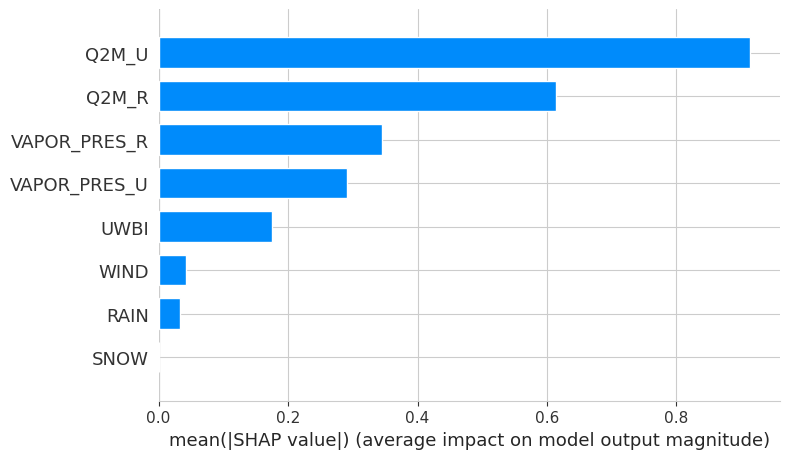

In [45]:
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Load your data
# Assuming 'uhi_diff_avg_df' is already in your environment

# Prepare the data
X = uhi_diff_avg_df[['UWBI', 'WIND', 'RAIN', 'SNOW', 'Q2M_R', 'Q2M_U', 'VAPOR_PRES_R', 'VAPOR_PRES_U']]
y = uhi_diff_avg_df['UHI']  # Assuming you want to predict UHI_diff directly

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Create SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summarize the SHAP values in a plot to show the impact of each feature
shap.summary_plot(shap_values, X_test, plot_type="bar")


strong positive correlation UHI and HW
negative event 
insignficant event 
global map 
for each grid # postive and negative interaction 
